In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Mixed_Beverage_Gross_Receipts.csv')

In [3]:
print(data.shape)
print(data.columns)

(2842120, 24)
Index(['Taxpayer Number', 'Taxpayer Name', 'Taxpayer Address', 'Taxpayer City',
       'Taxpayer State', 'Taxpayer Zip', 'Taxpayer County', 'Location Number',
       'Location Name', 'Location Address', 'Location City', 'Location State',
       'Location Zip', 'Location County', 'Inside/Outside City Limits',
       'TABC Permit Number', 'Responsibility Begin Date',
       'Responsibility End Date', 'Obligation End Date', 'Liquor Receipts',
       'Wine Receipts', 'Beer Receipts', 'Cover Charge Receipts',
       'Total Receipts'],
      dtype='object')


In [4]:
data.head()

,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Location Number,Location Name,Location Address,...,Inside/Outside City Limits,TABC Permit Number,Responsibility Begin Date,Responsibility End Date,Obligation End Date,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
0,32047970895,HONDURAS MAYA CAFE & BAR LLC,8011 HAZEN ST,HOUSTON,TX,77036.0,101,1,HONDURAS MAYA CAFE & BAR LLC,5945 BELLAIRE BLVD STE B,...,Y,MB817033,08/16/2012,09/12/2019,07/31/2019,0,0,0,0,0
1,32049923835,"MERMAID KARAOKE PRIVATE CLUB, INC.",2639 WALNUT HILL LN STE 225,DALLAS,TX,75229.0,57,1,MERMAID KARAOKE PRIVATE CLUB,1310 W CAMPBELL RD STE 103,...,Y,N 837378,04/12/2013,07/01/2015,08/31/2014,480,185,1374,0,2039
2,32034036304,FENG KAI CORPORATION,8427 BOULEVARD 26,N RICHLND HLS,TX,76180.0,220,1,JAPANESE GRILL,8427 BOULEVARD 26,...,Y,MB576670,05/01/2008,03/17/2018,06/30/2016,1143,167,669,0,1979
3,14537211071,"THE HUTTO SMITHS, LLC",429 LITTLE LAKE RD,HUTTO,TX,78634.0,246,1,THE DOWNTOWN HALL OF FAME,205 EAST ST,...,Y,MB791778,12/06/2011,NaN,03/31/2018,12881,357,10447,0,23685
4,32019999229,"THE CROSSING AT FIDDLE CREEK, INC.",1620 W CEDAR ST,STEPHENVILLE,TX,76401.0,72,1,THE CROSSING AT FIDDLE CREEK INC,2004 W SWAN ST,...,Y,N 643163,10/26/2006,11/30/2013,08/31/2008,4841,2413,4620,0,11874


In [5]:
sa_code = 15
dfw_code = [57, 220]
hou_code = 101
atx_code = 227

In [8]:
data['Obligation End Date'] = pd.to_datetime(data['Obligation End Date'])

In [17]:
beer_sales_by_year = data['Beer Receipts'].groupby(data['Obligation End Date'].dt.year).sum()

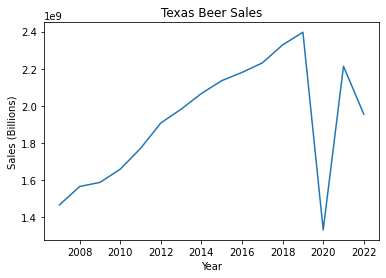

In [13]:
plt.plot(beer_sales_by_year)
plt.xlabel('Year')
plt.ylabel('Sales (Billions)')
plt.title('Texas Beer Sales')
plt.show()

In [26]:
data['total_sales'] = data['Beer Receipts'] + data['Liquor Receipts'] + data['Wine Receipts']
total_sales_by_year = data['total_sales'].groupby(data['Obligation End Date'].dt.year).sum()

In [28]:
percent_beer = (beer_sales_by_year / total_sales_by_year) * 100

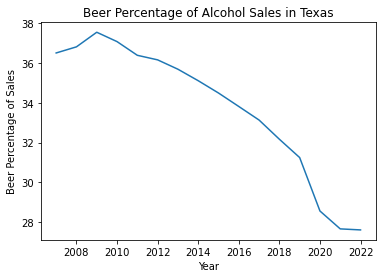

In [29]:
plt.plot(percent_beer)
plt.xlabel('Year')
plt.ylabel('Beer Percentage of Sales')
plt.title('Beer Percentage of Alcohol Sales in Texas')
plt.show()

In [45]:
dallas_beer = data[data['Taxpayer County'] == 57]['Beer Receipts'].groupby(data['Obligation End Date'].dt.year).sum()
dallas_total = data[data['Taxpayer County'] == 57]['total_sales'].groupby(data['Obligation End Date'].dt.year).sum()
fw_beer = data[data['Taxpayer County'] == 220]['Beer Receipts'].groupby(data['Obligation End Date'].dt.year).sum()
fw_total = data[data['Taxpayer County'] == 220]['total_sales'].groupby(data['Obligation End Date'].dt.year).sum()

In [46]:
atx_percent_beer = (data[data['Taxpayer County'] == atx_code]['Beer Receipts'].groupby(data['Obligation End Date'].dt.year).sum() / data[data['Taxpayer County'] == atx_code]['total_sales'].groupby(data['Obligation End Date'].dt.year).sum()) * 100
dfw_percent_beer = ((dallas_beer + fw_beer) / (dallas_total + fw_total)) * 100
sa_percent_beer = (data[data['Taxpayer County'] == sa_code]['Beer Receipts'].groupby(data['Obligation End Date'].dt.year).sum() / data[data['Taxpayer County'] == sa_code]['total_sales'].groupby(data['Obligation End Date'].dt.year).sum()) * 100
hou_percent_beer = (data[data['Taxpayer County'] == hou_code]['Beer Receipts'].groupby(data['Obligation End Date'].dt.year).sum() / data[data['Taxpayer County'] == hou_code]['total_sales'].groupby(data['Obligation End Date'].dt.year).sum()) * 100

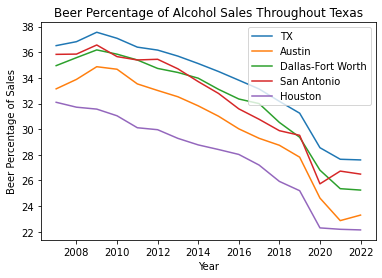

In [47]:
plt.plot(percent_beer)
plt.plot(atx_percent_beer)
plt.plot(dfw_percent_beer)
plt.plot(sa_percent_beer)
plt.plot(hou_percent_beer)
plt.xlabel('Year')
plt.ylabel('Beer Percentage of Sales')
plt.title('Beer Percentage of Alcohol Sales Throughout Texas')
plt.legend(['TX', 'Austin', 'Dallas-Fort Worth', 'San Antonio', 'Houston'], loc = 'upper right')
plt.show()

In [53]:
atx = data[data['Taxpayer County'] == atx_code]
atx_2021 = atx[atx['Obligation End Date'].dt.year == 2021]
atx_2021_top = atx_2021['Beer Receipts'].sort_values(['Taxpayer Name', 'Beer Receipts']).groupby('Taxpayer Name')

C:\Users\Zjbro\AppData\Local\Temp/ipykernel_1352/1268239965.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  atx_2021_top = atx_2021['Beer Receipts'].sort_values(['Taxpayer Name', 'Beer Receipts']).groupby('Taxpayer Name')


TypeError: unhashable type: 'list'